# Candles Example

## Intro

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from dotenv import load_dotenv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm, trange

from helixirapi.helixir_api import HelixirApi

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.io as pio
pio.renderers.default = "notebook_connected"

### Create client instance

In [5]:
load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirApi(auth_token=AUTH_TOKEN)
client

## Getting Data

Method `get_candles` returns price time series for a specific token for some time range.

***Parameters:***

`chain`
- It is an optional parameter with the default value `"bsc"` (_Binance Smart Chain_). The chain can be specified as a string (case insensitive) or an integer (chain id).

`symbol`
- The symbol is an optional parameter. It could be used instead of the `contract` parameter; however, the symbol must be unique (at least within the chain), so it could be used only for some tokens.

`contract`
- The contract parameter is required. However, as mentioned above, it could be omitted if the `symbol` is specified.

`against`
- By default, the price is stated in _USD_.

`from_`
- `from_` is the required parameter; however, the start of data history is used if omitted. The date could be entered as a timestamp (integer number) or by a human-readable string (e.g., `2022-05-01`).

`to`
- The default value is _now_. The format is the same as for parameter `from_`, so a timestamp or a string could be entered.

`resolution`
- By default, the resolution is _H1_ (one hour). The parameter is case insensitive.

`platform`
- The optional parameter with default value of the biggest platform on chain.

`validate_params`
- An optional parameter with a default value equal to _True_.

In [6]:
client.get_candles(
    symbol="wbnb",
    contract="0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
    chain="BSC",
    resolution="D1",
)

Iterating requests to meet the limit:   0%|          | 0/16 [00:00<?, ?it/s]

[TokenPriceResponse(
 	time = 2021-06-04 00:00:00+00:00,
 	open = 377.9238273639466,
 	high = 397.6949116376154,
 	low = 368.45679392599925,
 	close = 391.5921536004761,
 ),
 TokenPriceResponse(
 	time = 2021-06-05 00:00:00+00:00,
 	open = 391.59080929076066,
 	high = 424.7236739241255,
 	low = 375.06899236513294,
 	close = 391.37778162212163,
 ),
 TokenPriceResponse(
 	time = 2021-06-06 00:00:00+00:00,
 	open = 391.37647939265867,
 	high = 399.9706840853147,
 	low = 382.27640459970326,
 	close = 393.2860720064385,
 ),
 TokenPriceResponse(
 	time = 2021-06-07 00:00:00+00:00,
 	open = 393.2838871059696,
 	high = 406.12915741438474,
 	low = 354.8798393117795,
 	close = 357.16565383943595,
 ),
 TokenPriceResponse(
 	time = 2021-06-08 00:00:00+00:00,
 	open = 357.18437816672395,
 	high = 367.7492951127113,
 	low = 318.17520360108955,
 	close = 353.3239881771969,
 ),
 TokenPriceResponse(
 	time = 2021-06-09 00:00:00+00:00,
 	open = 353.3238696624392,
 	high = 378.13745373784343,
 	low = 334

## Plotting
Method for plotting the prices of the selected symbol for the required interval.

In addition to all parameters from the `get_candles` method, the following parameters are available here.

***Parameters:***

`kind`
- Primarily, this parameter is not used. The candlestick chart is produced. However, if the backend differs from the available one, this parameter is used with _line_ as a default value.

`backend`
- The default backend is _matplotlib_. _Plotly_ backend is also available.

`**kwargs`
- Other parameters specific to the selected backend could be specified (for example `figsize` in the Matplotlib example below).

### Matplotlib

Iterating requests to meet the limit:   0%|          | 0/16 [00:00<?, ?it/s]

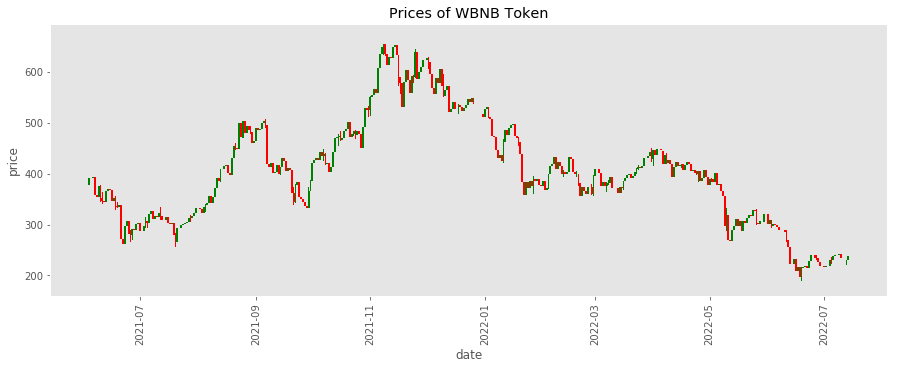

In [7]:
client.plot_candles(
    symbol="wbnb",
    contract="0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
    chain="BSC",
    resolution="D1",
    figsize=(15, 5),
)

### Plotly

In [8]:
client.plot_candles(
    symbol="wbnb",
    contract="0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
    chain="BSC",
    resolution="D1",
    backend="plotly",
)

Iterating requests to meet the limit:   0%|          | 0/16 [00:00<?, ?it/s]

### HvPlot or Other Backends

For other backends, this may not work, or at least no candles will be created.

In [9]:
client.plot_candles(
    symbol="wbnb",
    contract="0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c",
    chain="BSC",
    resolution="D1",
    backend="hvplot",
)

Iterating requests to meet the limit:   0%|          | 0/16 [00:00<?, ?it/s]

/home/rene/Documents/turing/repos/helixir-api-client/helixirapi/helixir_api.py:2062: UserWarning:

Other backends are not (yet) supporter in this method. It might not work.



ValueError: Could not find plotting backend 'hvplot'. Ensure that you've installed the package providing the 'hvplot' entrypoint, or that the package has a top-level `.plot` method.